<a href="https://colab.research.google.com/github/jayaasuthersen/EDA_DA/blob/main/21BDS0126_JayaaSuthersen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

JAYAA SUTHERSEN.A.R

21BDS0126

https://github.com/jayaasuthersen/EDA_DA

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data=pd.read_csv("Dataset.csv")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24/02/2020,5,5,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [21]:
# Shape of the dataset
print("Dataset dimensions (rows, columns):", data.shape)

# Preview the dataset
print(data.head())

# Column names
print("Column names:", data.columns.tolist())



Dataset dimensions (rows, columns): (5818, 67)
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  24/02/2020            5          5   
1      AFG      Asia  Afghanistan  25/02/2020            5          0   
2      AFG      Asia  Afghanistan  26/02/2020            5          0   
3      AFG      Asia  Afghanistan  27/02/2020            5          0   
4      AFG      Asia  Afghanistan  28/02/2020            5          0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facili

In [22]:
# Data types, non-null values, and memory usage
print(data.info())

# Statistical summary of numerical columns
print(data.describe())

# Summary of categorical columns
categorical_columns = ['iso_code', 'continent', 'location']
print(data[categorical_columns].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    5818 non-null   object 
 1   continent                                   5818 non-null   object 
 2   location                                    5818 non-null   object 
 3   date                                        5818 non-null   object 
 4   total_cases                                 5818 non-null   int64  
 5   new_cases                                   5818 non-null   int64  
 6   new_cases_smoothed                          5788 non-null   float64
 7   total_deaths                                5638 non-null   float64
 8   new_deaths                                  5627 non-null   float64
 9   new_deaths_smoothed                         5596 non-null   float64
 10  total_cases_

In [23]:
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print("Duplicates:", data.duplicated().sum())


iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
human_development_index                       0
excess_mortality_cumulative_absolute       5397
excess_mortality_cumulative                5397
excess_mortality                           5397
excess_mortality_cumulative_per_million    5397
Length: 67, dtype: int64
Duplicates: 0


In [24]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Check for duplicates
print("Number of duplicate rows:", data.duplicated().sum())

# Handle duplicates
data = data.drop_duplicates()


Missing values per column:
 iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
human_development_index                       0
excess_mortality_cumulative_absolute       5397
excess_mortality_cumulative                5397
excess_mortality                           5397
excess_mortality_cumulative_per_million    5397
Length: 67, dtype: int64
Number of duplicate rows: 0


In [25]:
# Fill missing numerical values with median
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Fill missing categorical values with mode
for col in categorical_columns:
    # Check if mode is empty before accessing element 0
    mode_values = data[col].mode()
    if not mode_values.empty:
        data[col] = data[col].fillna(mode_values.iloc[0])  # Use iloc to access by position

# Re-check for missing values
print("Missing values after cleaning:\n", data.isnull().sum())

Missing values after cleaning:
 iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
                                          ..
human_development_index                    0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative                0
excess_mortality                           0
excess_mortality_cumulative_per_million    0
Length: 67, dtype: int64


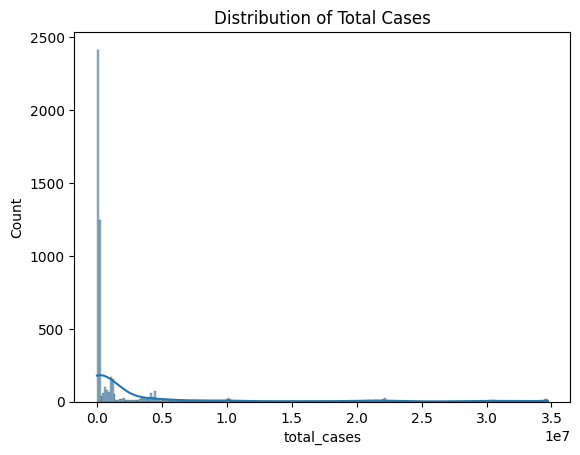

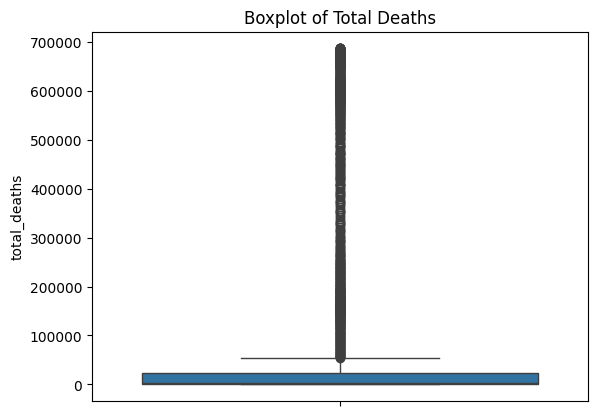

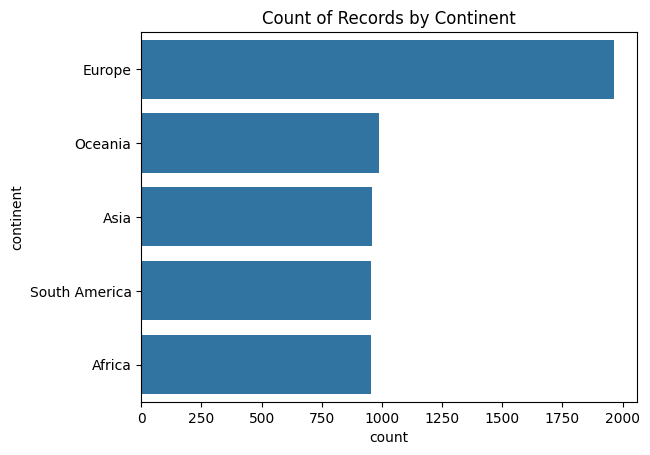

In [26]:
# Distribution of total cases
sns.histplot(data['total_cases'], kde=True)
plt.title("Distribution of Total Cases")
plt.show()

# Boxplot for total deaths
sns.boxplot(data['total_deaths'])
plt.title("Boxplot of Total Deaths")
plt.show()

# Countplot for continent
sns.countplot(y=data['continent'], order=data['continent'].value_counts().index)
plt.title("Count of Records by Continent")
plt.show()


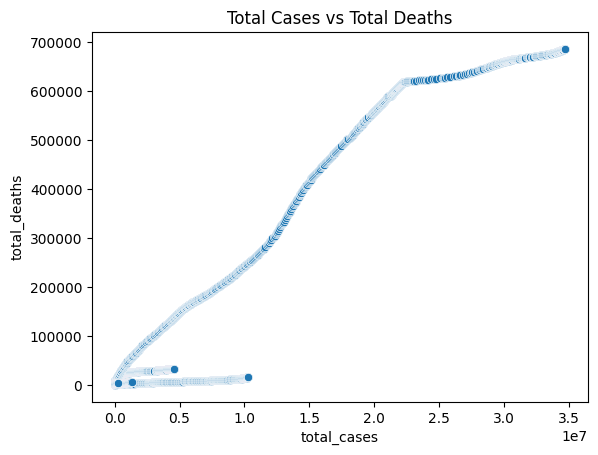

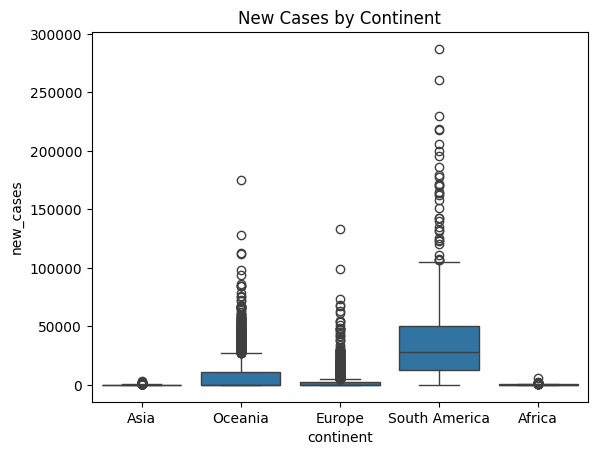

In [29]:
# Scatter plot: Total cases vs Total deaths
sns.scatterplot(x='total_cases', y='total_deaths', data=data)
plt.title("Total Cases vs Total Deaths")
plt.show()



# Boxplot: New cases per continent
sns.boxplot(x='continent', y='new_cases', data=data)
plt.title("New Cases by Continent")
plt.show()


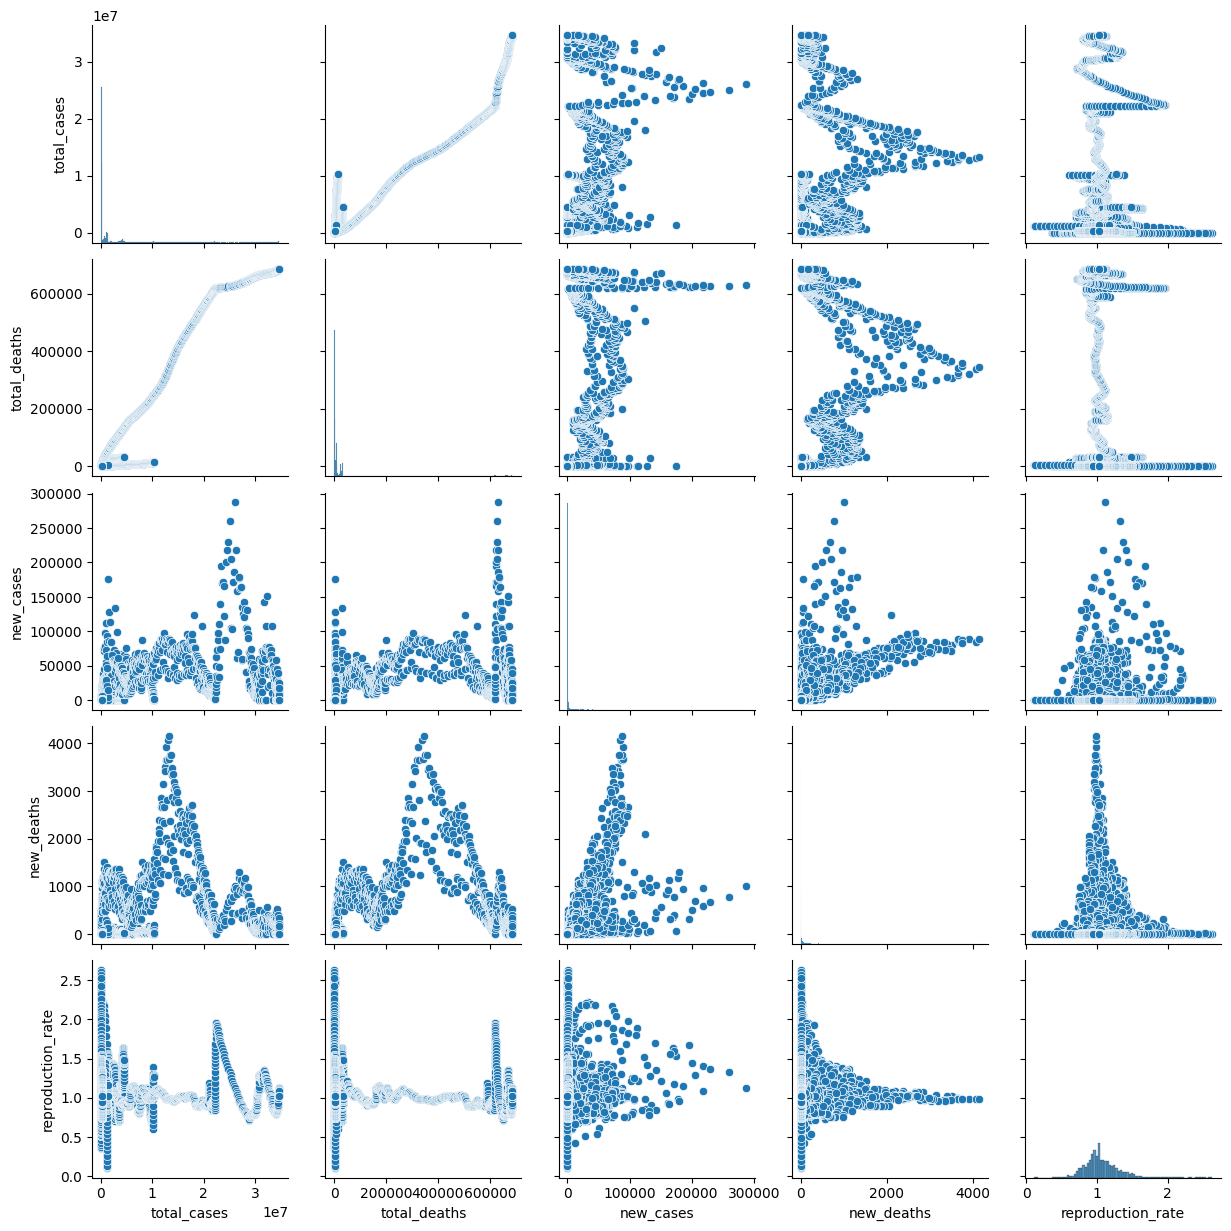

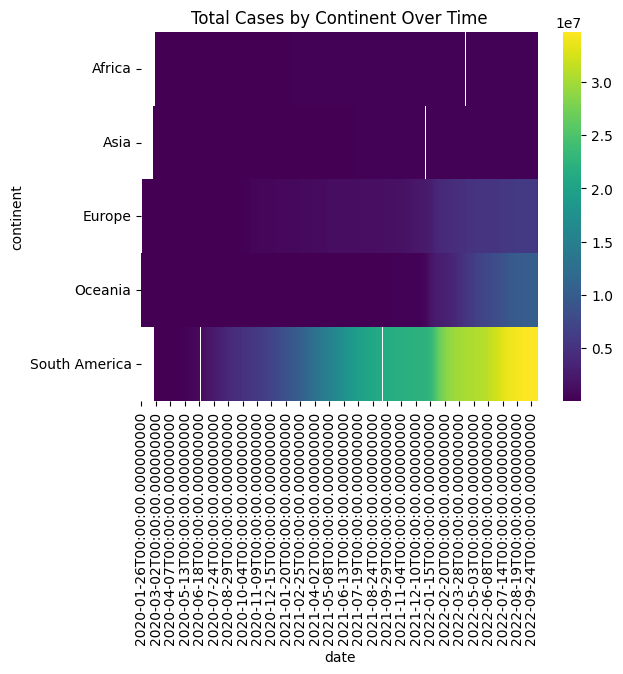

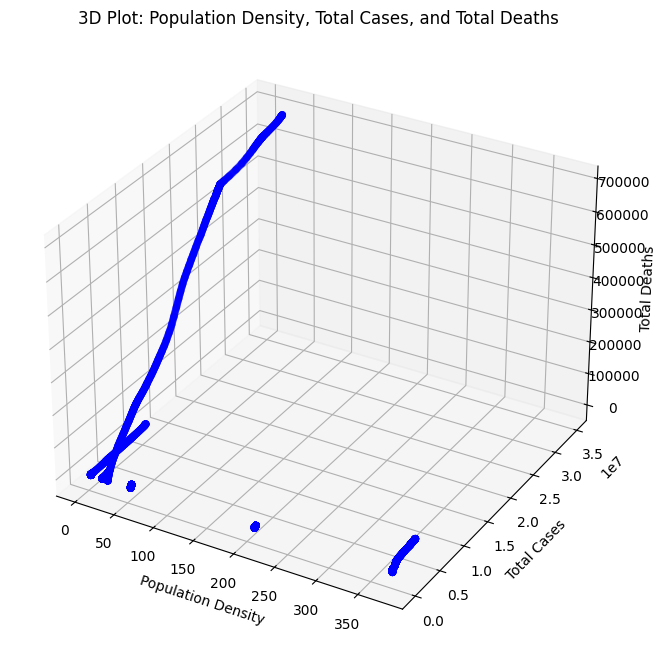

In [30]:
# Pairplot for key attributes
key_attributes = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'reproduction_rate']
sns.pairplot(data[key_attributes])
plt.show()

# Multivariate heatmap: Cases by continent over time
pivot_table = data.pivot_table(values='total_cases', index='continent', columns='date', aggfunc='sum')
sns.heatmap(pivot_table, cmap='viridis')
plt.title("Total Cases by Continent Over Time")
plt.show()

# 3D scatter plot for population density, total cases, and total deaths
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['population_density'], data['total_cases'], data['total_deaths'], c='blue', marker='o')
ax.set_xlabel('Population Density')
ax.set_ylabel('Total Cases')
ax.set_zlabel('Total Deaths')
plt.title("3D Plot: Population Density, Total Cases, and Total Deaths")
plt.show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select relevant features for modeling (replace with the actual columns you want)
features = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'population_density']
target = 'continent'  # Assuming 'continent' as the target variable for classification

# Drop rows with missing target
data = data.dropna(subset=[target])

# Encode target labels if categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])

# Split data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Set k=5 (can be tuned)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       321
           2       1.00      1.00      1.00       599
           3       0.99      1.00      0.99       295
           4       1.00      1.00      1.00       268

    accuracy                           1.00      1746
   macro avg       1.00      1.00      1.00      1746
weighted avg       1.00      1.00      1.00      1746

Confusion Matrix:
 [[263   0   0   0   0]
 [  0 321   0   0   0]
 [  0   0 597   2   0]
 [  0   0   1 294   0]
 [  0   0   0   1 267]]


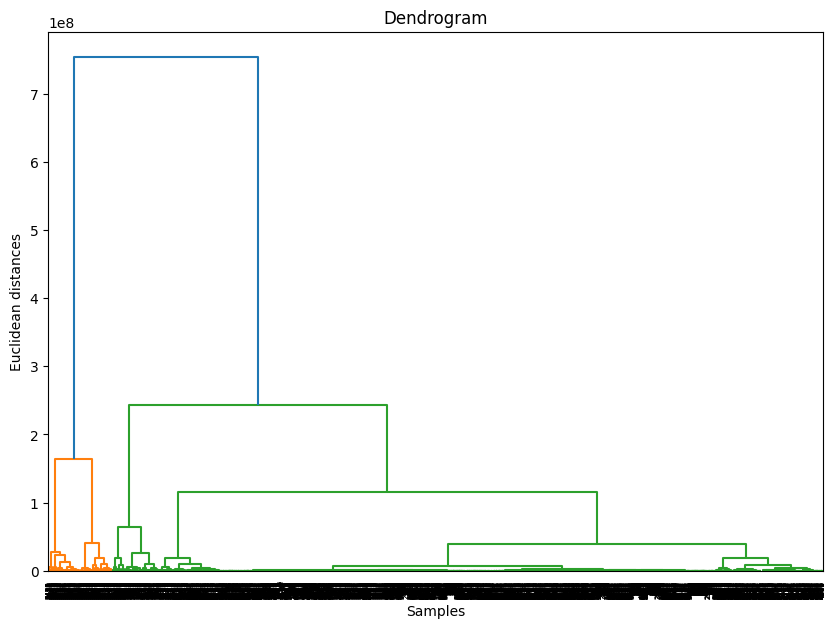

Cluster Labels:
 Cluster
1    4983
0     486
2     349
Name: count, dtype: int64


In [34]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Hierarchical clustering dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean distances")
plt.show()

# Apply Agglomerative Clustering
# Removing the 'affinity' argument as it's not needed with 'ward' linkage
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Change clusters as needed
clusters = agglomerative.fit_predict(X)

# Add cluster labels to the dataset for visualization
data['Cluster'] = clusters
print("Cluster Labels:\n", data['Cluster'].value_counts())

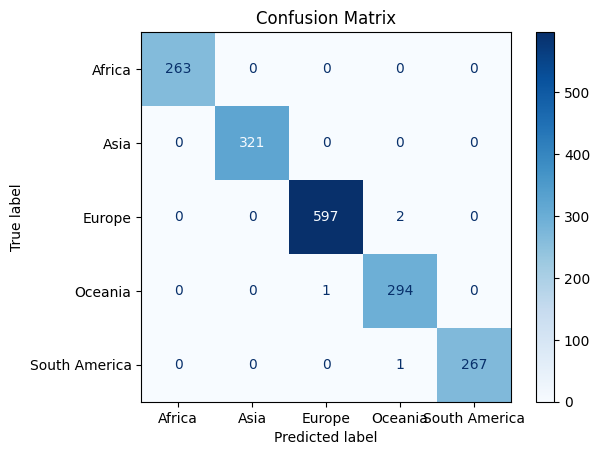

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [36]:
# Ensure the variables are categorical
data['continent'] = data['continent'].astype('category')
data['Cluster'] = data['Cluster'].astype('category')

# Build the contingency table
contingency_table = pd.crosstab(data['continent'], data['Cluster'])

# Display the table
print("Contingency Table:")
print(contingency_table)


Contingency Table:
Cluster      0     1    2
continent                
0            0   955    0
1            0   958    0
2            0  1963    0
3            0   832  155
4          486   275  194


In [37]:
# Normalize by rows (percentage within each continent)
row_percentage = pd.crosstab(data['continent'], data['Cluster'], normalize='index') * 100
print("\nRow-wise Percentage Table:")
print(row_percentage)

# Normalize by columns (percentage within each cluster)
column_percentage = pd.crosstab(data['continent'], data['Cluster'], normalize='columns') * 100
print("\nColumn-wise Percentage Table:")
print(column_percentage)



Row-wise Percentage Table:
Cluster            0           1          2
continent                                  
0           0.000000  100.000000   0.000000
1           0.000000  100.000000   0.000000
2           0.000000  100.000000   0.000000
3           0.000000   84.295846  15.704154
4          50.890052   28.795812  20.314136

Column-wise Percentage Table:
Cluster        0          1          2
continent                             
0            0.0  19.165162   0.000000
1            0.0  19.225366   0.000000
2            0.0  39.393939   0.000000
3            0.0  16.696769  44.412607
4          100.0   5.518764  55.587393


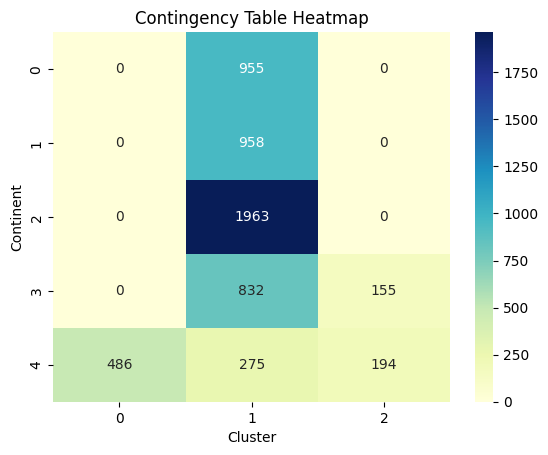

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the contingency table
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Contingency Table Heatmap")
plt.xlabel("Cluster")
plt.ylabel("Continent")
plt.show()


In [40]:
from scipy.stats import chi2_contingency

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)



Chi-Square Test Results:
Chi-Square Statistic: 3642.3645971232972
P-Value: 0.0
Degrees of Freedom: 8
Expected Frequencies:
[[  79.77483671  817.93829495   57.28686834]
 [  80.02543829  820.50773462   57.46682709]
 [ 163.97696803 1681.27002406  117.75300791]
 [  82.44792025  845.34565143   59.20642833]
 [  79.77483671  817.93829495   57.28686834]]


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select relevant features and target variable
features = ['population_density', 'gdp_per_capita', 'median_age', 'stringency_index']
target = 'total_cases'

# Drop rows with missing values in the relevant columns
data = data.dropna(subset=features + [target])

# Define X (features) and y (target)
X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
print("Linear Regression Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Linear Regression Coefficients: [  -771835.28277051 -11537645.02906539  11397295.12881117
   -945598.23525832]
Intercept: 3448772.383805463
Mean Squared Error: 34510832213815.57
R^2 Score: 0.3702968646702349


In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a pipeline with polynomial features
poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train, y_train)

# Predictions
y_pred_poly = poly_reg.predict(X_test)

# Evaluate the model
print("Polynomial Regression Mean Squared Error:", mean_squared_error(y_test, y_pred_poly))
print("Polynomial Regression R^2 Score:", r2_score(y_test, y_pred_poly))


Polynomial Regression Mean Squared Error: 12055323112022.299
Polynomial Regression R^2 Score: 0.7800321153074123


In [44]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
print("Random Forest Regression Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest Regression R^2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regression Mean Squared Error: 1271488936813.2576
Random Forest Regression R^2 Score: 0.9767997316005642


In [46]:
# Linear Regression Predictions
y_pred_linear = lin_reg.predict(X_test)

# Polynomial Regression Predictions
y_pred_poly = poly_reg.predict(X_test)

# Random Forest Regression Predictions
y_pred_rf = rf_reg.predict(X_test)


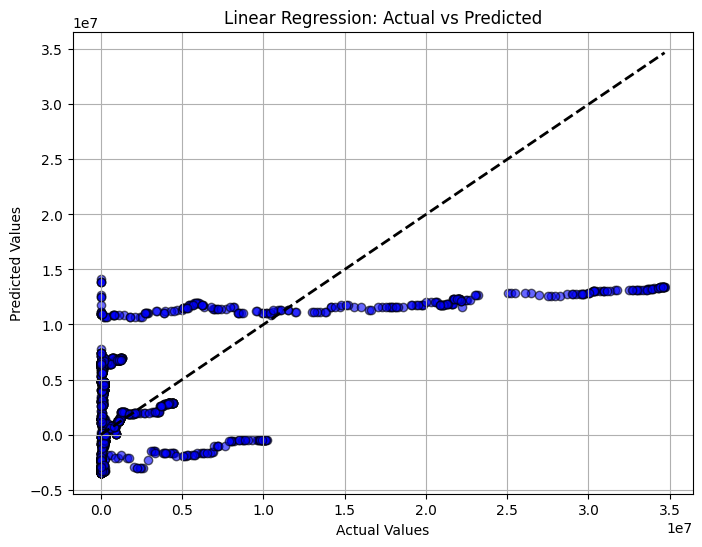

In [50]:
import matplotlib.pyplot as plt

# Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()



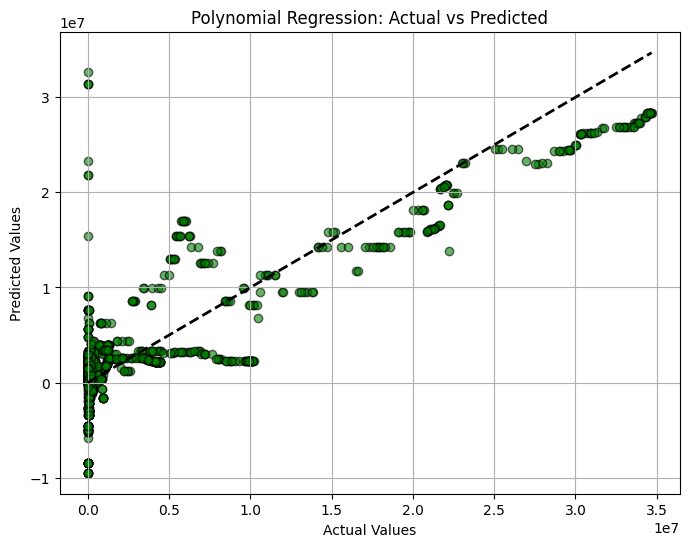

In [49]:
# Polynomial Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
plt.title("Polynomial Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

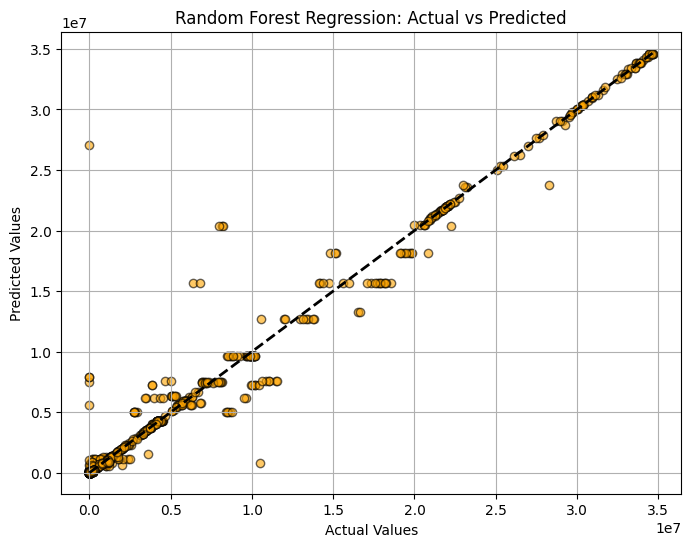

In [51]:
# Random Forest Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='orange', alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
plt.title("Random Forest Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler

# Select relevant numerical features for clustering
features = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'population_density']
data_cluster = data[features].dropna()

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)


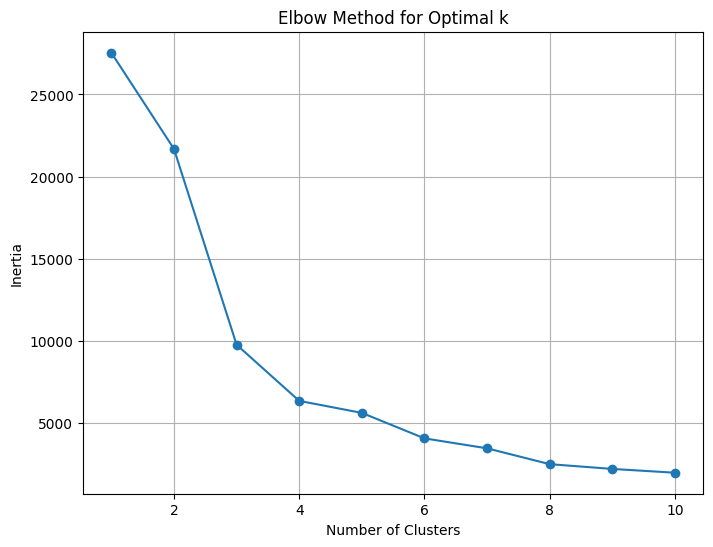

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [55]:
# Fit K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Replace 3 with your chosen k
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataset
# Instead of directly assigning to 'data', create a new column in 'data_cluster'
data_cluster['Cluster'] = clusters

# Merge 'data_cluster' back into 'data' based on the common index
data = data.merge(data_cluster[['Cluster']], left_index=True, right_index=True, how='left')

print("Cluster Labels:\n", data['Cluster'].value_counts())

Cluster Labels:
 Cluster
1.0    3053
0.0    1813
2.0     642
Name: count, dtype: int64


In [57]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Instead of directly assigning to 'data', create new columns in 'data_cluster'
data_cluster['PCA1'] = data_pca[:, 0]
data_cluster['PCA2'] = data_pca[:, 1]

# Merge 'data_cluster' back into 'data' based on the common index
data = data.merge(data_cluster[['PCA1', 'PCA2']], left_index=True, right_index=True, how='left')

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.56792667 0.18316617]


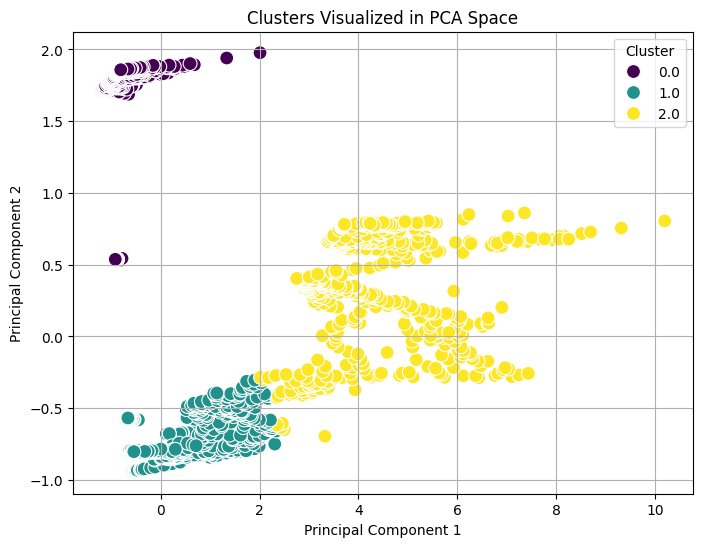

In [58]:
import seaborn as sns

# Scatter plot of clusters in PCA-reduced space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['Cluster'], palette='viridis', s=100)
plt.title("Clusters Visualized in PCA Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
